In [1]:
# Dependencies

import pandas as pd
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA
from pprint import pprint
from datetime import datetime

In [2]:
!pip install plotly

# 1. Data Preparation

### Load data

In [3]:
data = pd.read_csv("./Resources/Indicators.csv")
data.shape

(5656458, 6)

This is large dataset

In [4]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


This is four - dimensional  dataset where dimensions are Country, Indicator, Year and Value

## How many UNIQUE country names are there?

In [5]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

## Are there same number of country codes?

In [6]:
# This should be the same as country names

country_codes = data['CountryCode'].unique().tolist()
len(country_codes)

247

## How many indicators are in the dataset?

In [7]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

## How many years of data do we have?

In [8]:
years = data['Year'].unique().tolist()
len(years)

56

## What's the range of years?

In [9]:
print(min(years), 'to', max(years))

1960 to 2015


Let's Narrow Down the original dataframe and make the column number equal to the size of dimensions

In [10]:
short_data = data[['CountryCode', 'IndicatorName', 'Year', 'Value']]
short_data.head(10)

,CountryCode,IndicatorName,Year,Value
0,ARB,"Adolescent fertility rate (births per 1,000 wo...",1960,1.335609e+02
1,ARB,Age dependency ratio (% of working-age populat...,1960,8.779760e+01
2,ARB,"Age dependency ratio, old (% of working-age po...",1960,6.634579e+00
3,ARB,"Age dependency ratio, young (% of working-age ...",1960,8.102333e+01
4,ARB,Arms exports (SIPRI trend indicator values),1960,3.000000e+06
5,ARB,Arms imports (SIPRI trend indicator values),1960,5.380000e+08
6,ARB,"Birth rate, crude (per 1,000 people)",1960,4.769789e+01
7,ARB,CO2 emissions (kt),1960,5.956399e+04
8,ARB,CO2 emissions (metric tons per capita),1960,6.439635e-01
9,ARB,CO2 emissions from gaseous fuel consumption (%...,1960,5.041292e+00


## Quick glance at the data to be explored and Initial Data Exploration

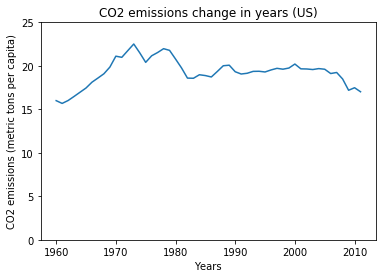

In [11]:
co2 = short_data['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita')
#forest = data['IndicatorName'].str.contains('Forest area \(%')

country = (short_data['CountryCode'] == "USA")
co2_us  = short_data[co2 & country]
co2_us = co2_us.reset_index(drop = True)
#plt.ylim(0, 30)
plt.xlabel('Years')
plt.ylim(0,25)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 emissions change in years (US)')
plt.plot(co2_us['Year'], co2_us['Value'].values)
plt.show()

It looks like there was a big jump in CO2 emissions in 1960-1970 and after 1980 the CO2 emissions per capita reduced. Of course it can be due to the immigration flock and sudden increase in the population that could lead to the reduction of te per capita amount but that data is not present in our dataset. Usually CO2 emissions change are consistent with its different components that we explored below

### Using Hisograms to explore the distribution of values

In [12]:
# print out the number of elements in hist_data
hist_data = co2_us['Value'].values
print(len(hist_data))

52


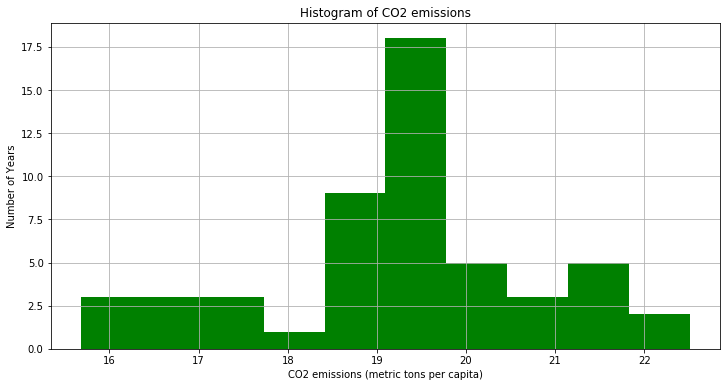

In [13]:
# the histogram of data
plt.figure(figsize=(12,6))
plt.hist(hist_data, 10, density=False, facecolor='green')
plt.xlabel(co2_us['IndicatorName'].iloc[0])
plt.ylabel('Number of Years')
plt.title('Histogram of CO2 emissions')
plt.grid()
plt.show()

So the USA has many years where it produced between 19-20 metric tons per capita.

### How do the USA numbers relate to those of other countries?

In [14]:
hist_indicator = "CO2 emissions \(metric tons per capita"
hist_year = 2011

mask1 = short_data['IndicatorName'].str.contains(hist_indicator)
mask2 = short_data['Year'].isin([hist_year])

# apply mask

co2_2011 = short_data[mask1 & mask2]
co2_2011.head()

,CountryCode,IndicatorName,Year,Value
5026275,ARB,CO2 emissions (metric tons per capita),2011,4.724500
5026788,CSS,CO2 emissions (metric tons per capita),2011,9.692960
5027295,CEB,CO2 emissions (metric tons per capita),2011,6.911131
5027870,EAS,CO2 emissions (metric tons per capita),2011,5.859548
5028456,EAP,CO2 emissions (metric tons per capita),2011,5.302499


Just looking at this values we can see that the US numbers are way too high than the rest of the world. Let's create a histogram that contains all the countries as well as the USA.

Let's see how many countries we have in this new dataset

In [15]:
print(len(co2_2011))

232


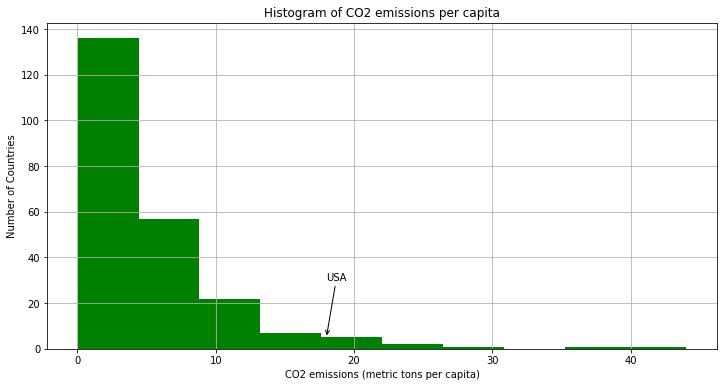

In [16]:
# Let's plot a histogram of the emissions per capita by country

fig, ax = plt.subplots(figsize=(12,6))
ax.annotate("USA", xy = (18,5), xycoords = 'data',
           xytext=(18,30), textcoords='data', arrowprops = dict(arrowstyle="->", connectionstyle = "arc3"))

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')
plt.xlabel(co2_2011['IndicatorName'].iloc[0])
plt.ylabel('Number of Countries')
plt.title('Histogram of CO2 emissions per capita')
plt.grid()
plt.show()

It looks like USA is the real outlier here

### Let's look at the how the US stands against the World on the map

In [17]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = co2_2011['CountryCode'],
    z = co2_2011['Value'],
    autocolorscale=True,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = 'metric tons pc ',
    colorbar_title = 'CO2 emission metric tons per capita'))
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4))
fig.show()

In [18]:
short_data[short_data['IndicatorName'].str.contains('mpg')]['IndicatorName'].unique()

array([], dtype=object)

### CO2 Emissions have different sources

* CO2 emissions from gaseous fuel consumption (% of total)
* CO2 emissions from liquid fuel consumption (% of total)
* CO2 emissions from electricity and heat production, total (% of total fuel combustion)
* CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
* CO2 emissions from transport (% of total fuel combustion)


As we see, the values of these different CO2 emissions differ. So let's bring them to Per Capita unit first and store them in 
separate dataframes

In [19]:
co2_mask = short_data['IndicatorName'].str.contains("CO2 emissions \(metric tons per capita")
co2_us = short_data[co2_mask & country]
co2_us = co2_us.reset_index(drop = True)
print(f"Data contains period from {co2_us['Year'].min()} to {co2_us['Year'].max()}")

Data contains period from 1960 to 2011


In [20]:
gas_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from gaseous fuel consumption \(% of total")
gas_fuel = short_data[gas_fuel_mask & country]
gas_fuel = gas_fuel.reset_index(drop = True)
print(f"Data contains period from {gas_fuel['Year'].min()} to {gas_fuel['Year'].max()}")

Data contains period from 1960 to 2011


In [21]:
liq_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from liquid fuel consumption \(% of total")
liq_fuel = short_data[liq_fuel_mask & country]
liq_fuel = liq_fuel.reset_index(drop = True)
print(f"Data contains period from {liq_fuel['Year'].min()} to {liq_fuel['Year'].max()}")

Data contains period from 1960 to 2011


In [22]:
sol_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from solid fuel consumption \(% of total")
sol_fuel = short_data[sol_fuel_mask & country]
sol_fuel = sol_fuel.reset_index(drop = True)
print(f"Data contains period from {sol_fuel['Year'].min()} to {sol_fuel['Year'].max()}")

Data contains period from 1960 to 2011


The following three indicators are more of breakdown of the fuel usage based on the industry. Can be something interesting to look at later

In [23]:
elec_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from electricity and heat production, total \(% of total fuel combustion")
elec_fuel = short_data[elec_fuel_mask & country]
elec_fuel = elec_fuel.reset_index(drop = False)
print(f"Data contains period from {elec_fuel['Year'].min()} to {elec_fuel['Year'].max()}")

Data contains period from 1960 to 2012


In [24]:
ind_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from manufacturing industries and construction \(% of total fuel combustion")
ind_fuel = short_data[ind_fuel_mask & country]
ind_fuel = ind_fuel.reset_index(drop = False)
print(f"Data contains period from {ind_fuel['Year'].min()} to {ind_fuel['Year'].max()}")

Data contains period from 1960 to 2012


In [25]:
trans_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from transport \(% of total fuel combustion")
trans_fuel = short_data[trans_fuel_mask & country]
trans_fuel = trans_fuel.reset_index(drop = True)
print(f"Data contains period from {trans_fuel['Year'].min()} to {trans_fuel['Year'].max()}")

Data contains period from 1960 to 2012


We can see that some of these indicators does not possess data for 2012 year. Therefore it is important to restrict our analysis to the period from 1960 to 2011. For that, we have to leave 2012 data out from all applicable datasets.

In [26]:
elec_fuel = elec_fuel[elec_fuel['Year'] < 2012]
ind_fuel = ind_fuel[ind_fuel['Year'] < 2012]
trans_fuel = trans_fuel[trans_fuel['Year'] < 2012]
print(f"Data contains period from {elec_fuel['Year'].min()} to {elec_fuel['Year'].max()}")
print(f"Data contains period from {ind_fuel['Year'].min()} to {ind_fuel['Year'].max()}")
print(f"Data contains period from {trans_fuel['Year'].min()} to {trans_fuel['Year'].max()}")

Data contains period from 1960 to 2011
Data contains period from 1960 to 2011
Data contains period from 1960 to 2011


Let's fix the values we are going to be workign with. All mentioned CO2 emission sources will be compared against the CO2 emissions (metric tons per capita), therefore it is important that the values for all indicators are in metric tons per capita as well.


In [27]:
gas_fuel['gas_val_pc'] = gas_fuel['Value']/100 * co2_us['Value']
liq_fuel['liq_val_pc'] = liq_fuel['Value']/100 * co2_us['Value']
sol_fuel['sol_val_pc'] = sol_fuel['Value']/100 * co2_us['Value']

It is time to merge our three datasets into one and conduct data analysis process. But before that we have to make sure that the indicator columns are named distinctively.

In [28]:
co2_us = co2_us.rename(columns={'IndicatorName': 'CO2_Indicator', 'Value': 'co2_val_pc'})
gas_fuel = gas_fuel.rename(columns={'IndicatorName': 'Gas_Indicator', 'Value': 'Gas_Val'})
liq_fuel = liq_fuel.rename(columns={'IndicatorName': 'Liquid_Indicator', 'Value': 'Liq_Val'})
sol_fuel = sol_fuel.rename(columns={'IndicatorName': 'Solid_Indicator', 'Value': 'Sol_Val'})

In [29]:
merge1 = pd.merge(co2_us, gas_fuel, how='outer')
merge2 = pd.merge(liq_fuel, sol_fuel, how='outer')
fuel_df = pd.merge(merge1, merge2, how='outer')

Let's see the final percentage of CO2 emissions from  three fuel consumption indicator values per capita of the total CO2 emission per capita by adding one column: 

In [30]:
fuel_df['% of Total'] = fuel_df['Gas_Val'] + fuel_df['Liq_Val'] + fuel_df['Sol_Val']
fuel_df

,CountryCode,CO2_Indicator,Year,co2_val_pc,Gas_Indicator,Gas_Val,gas_val_pc,Liquid_Indicator,Liq_Val,liq_val_pc,Solid_Indicator,Sol_Val,sol_val_pc,% of Total
0,USA,CO2 emissions (metric tons per capita),1960,15.999779,CO2 emissions from gaseous fuel consumption (%...,21.812762,3.489994,CO2 emissions from liquid fuel consumption (% ...,44.372701,7.099534,CO2 emissions from solid fuel consumption (% o...,31.781809,5.085019,97.967271
1,USA,CO2 emissions (metric tons per capita),1961,15.681256,CO2 emissions from gaseous fuel consumption (%...,22.111949,3.467431,CO2 emissions from liquid fuel consumption (% ...,45.074670,7.068274,CO2 emissions from solid fuel consumption (% o...,30.833803,4.835127,98.020422
2,USA,CO2 emissions (metric tons per capita),1962,16.013937,CO2 emissions from gaseous fuel consumption (%...,22.660655,3.628863,CO2 emissions from liquid fuel consumption (% ...,44.718697,7.161224,CO2 emissions from solid fuel consumption (% o...,30.850619,4.940399,98.229970
3,USA,CO2 emissions (metric tons per capita),1963,16.482762,CO2 emissions from gaseous fuel consumption (%...,23.051955,3.799599,CO2 emissions from liquid fuel consumption (% ...,43.612321,7.188515,CO2 emissions from solid fuel consumption (% o...,31.668591,5.219858,98.332867
4,USA,CO2 emissions (metric tons per capita),1964,16.968119,CO2 emissions from gaseous fuel consumption (%...,23.332109,3.959020,CO2 emissions from liquid fuel consumption (% ...,42.845848,7.270134,CO2 emissions from solid fuel consumption (% o...,32.249262,5.472093,98.427220
5,USA,CO2 emissions (metric tons per capita),1965,17.451725,CO2 emissions from gaseous fuel consumption (%...,23.098302,4.031052,CO2 emissions from liquid fuel consumption (% ...,43.229845,7.544354,CO2 emissions from solid fuel consumption (% o...,32.189231,5.617576,98.517378
6,USA,CO2 emissions (metric tons per capita),1966,18.121073,CO2 emissions from gaseous fuel consumption (%...,23.664387,4.288241,CO2 emissions from liquid fuel consumption (% ...,42.980523,7.788532,CO2 emissions from solid fuel consumption (% o...,31.827190,5.767428,98.472100
7,USA,CO2 emissions (metric tons per capita),1967,18.598318,CO2 emissions from gaseous fuel consumption (%...,23.865656,4.438611,CO2 emissions from liquid fuel consumption (% ...,43.036269,8.004022,CO2 emissions from solid fuel consumption (% o...,31.496018,5.857729,98.397943
8,USA,CO2 emissions (metric tons per capita),1968,19.089389,CO2 emissions from gaseous fuel consumption (%...,24.459428,4.669155,CO2 emissions from liquid fuel consumption (% ...,44.130759,8.424292,CO2 emissions from solid fuel consumption (% o...,29.768477,5.682620,98.358665
9,USA,CO2 emissions (metric tons per capita),1969,19.857946,CO2 emissions from gaseous fuel consumption (%...,25.316270,5.027291,CO2 emissions from liquid fuel consumption (% ...,44.303040,8.797674,CO2 emissions from solid fuel consumption (% o...,28.795536,5.718202,98.414846


# 2. Data Exploration


#### At this point, we have a good dataset to explore. Let's see the correlation between different components of sources of CO2 emission

In [31]:
fuel_df[['co2_val_pc','gas_val_pc', 'liq_val_pc', 'sol_val_pc']].corr()

,co2_val_pc,gas_val_pc,liq_val_pc,sol_val_pc
co2_val_pc,1.000000,0.674336,0.882361,0.248694
gas_val_pc,0.674336,1.000000,0.618877,-0.233168
liq_val_pc,0.882361,0.618877,1.000000,-0.173929
sol_val_pc,0.248694,-0.233168,-0.173929,1.000000


We can observe from above table that there is strong correlation between the co2 emission per capita and liquid fuel consumption per capita. There is also strong relation betweehn the co2 emission and the gaseous fuel consumption. 

Let's plot for a better visualization

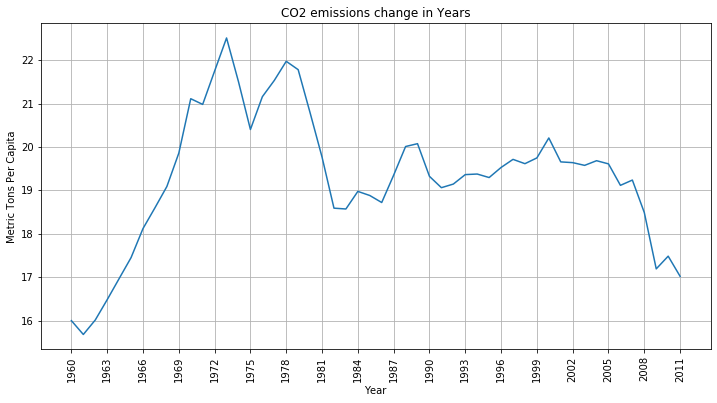

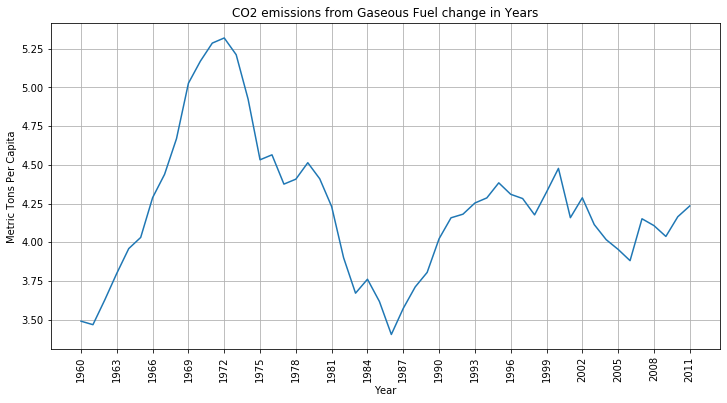

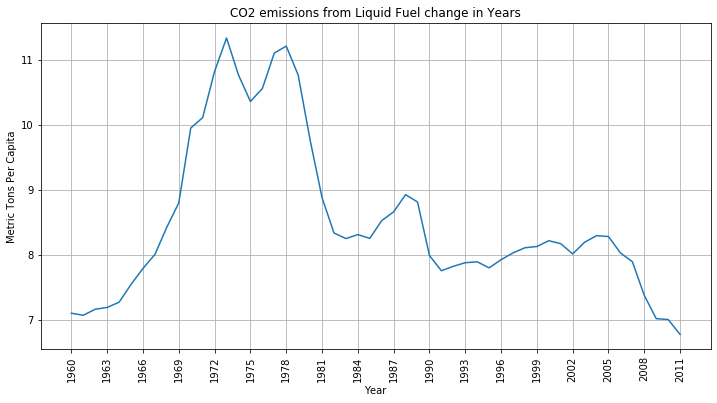

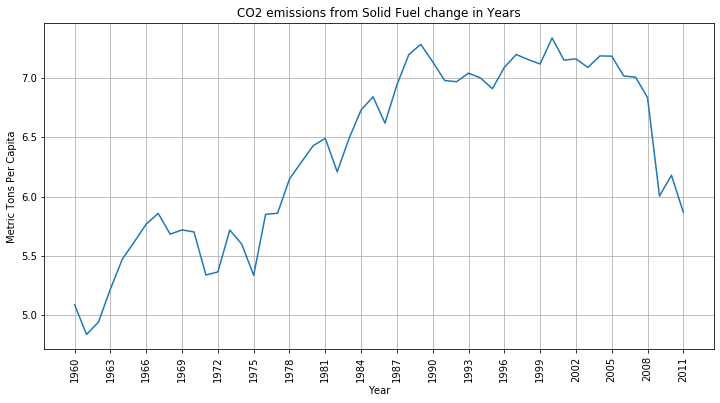

In [32]:
plt.figure('co2', figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['co2_val_pc'])
plt.title('CO2 emissions change in Years')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')
plt.grid()
plt.figure('gas', figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['gas_val_pc'])
plt.title('CO2 emissions from Gaseous Fuel change in Years')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')
plt.grid()
plt.figure('liquid', figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['liq_val_pc'])
plt.title('CO2 emissions from Liquid Fuel change in Years')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')
plt.grid()
plt.figure('solid', figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['sol_val_pc'])
plt.title('CO2 emissions from Solid Fuel change in Years')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')
plt.grid()
plt.show()

### Import fact:

* Although for the most part Total CO2 emission per capita and CO2 emissions from Liquid fuel behave similary and strongly correlated, after the Recession behaviour of the total CO2 emissions and the CO2 emissions from Solid Fuel is very similar. Does this mean that main liquid fuel users swithing to alternative energy? We will try to look at it futher in our analysis.

In [33]:
interesting_df = fuel_df[fuel_df['Year'] >= 2008]
interesting_df[['co2_val_pc','gas_val_pc', 'liq_val_pc', 'sol_val_pc']].corr()

,co2_val_pc,gas_val_pc,liq_val_pc,sol_val_pc
co2_val_pc,1.000000,-0.275434,0.952902,0.999700
gas_val_pc,-0.275434,1.000000,-0.553116,-0.298687
liq_val_pc,0.952902,-0.553116,1.000000,0.960034
sol_val_pc,0.999700,-0.298687,0.960034,1.000000


At this point we have multiple metrics that have different dimension. Let's put all metrics in one plot and see how they compare against each other.

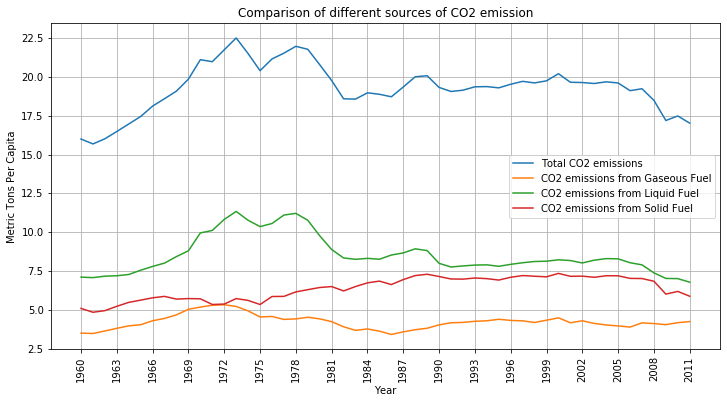

In [34]:
plt.figure(figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['co2_val_pc'], label='Total CO2 emissions')
plt.title('Comparison of different sources of CO2 emission')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')

plt.plot(fuel_df['Year'], fuel_df['gas_val_pc'], label='CO2 emissions from Gaseous Fuel')

plt.plot(fuel_df['Year'], fuel_df['liq_val_pc'], label='CO2 emissions from Liquid Fuel')

plt.plot(fuel_df['Year'], fuel_df['sol_val_pc'], label='CO2 emissions from Solid Fuel')

plt.legend()
plt.grid()
plt.show()

Because CO2 emission behaves linearly in the beginning and then changes in irregular fashion it would be better to devide the CO2 emission to different timeframes.

In [35]:
# We can observe that the CO2 emission constantly increase during the period 1960-1973
co2_us_first = co2_us[co2_us['Year'] < 1974]

# There is a considerable dip between 1973 - 1975
co2_us_second = co2_us[(co2_us['Year'] >= 1973) & (co2_us['Year'] < 1976)]

#There is again a jump in 1975-1978
co2_us_third = co2_us[(co2_us['Year'] >= 1975) & (co2_us['Year'] < 1979)]

# Considerable dip in 1978-1982
co2_us_fourth = co2_us[(co2_us['Year'] >= 1978) & (co2_us['Year'] < 1983)]

# Then the CO2 emissions more or less regular and stable till 2005
co2_us_fifth = co2_us[(co2_us['Year'] >= 1982) & (co2_us['Year'] < 2006)]

# After this period CO2 emission hits its minimum since 1966 
co2_us_last = co2_us[(co2_us['Year'] >= 2005) & (co2_us['Year'] < 2012)]

### Facts:

* The dip in CO2 emission in starting from 1973 to 1975 is related to the Oil Crisis caused by Arab Petroleum Exporting Countries proclaiming an oil embargo at nations perceived as supporting Israel.

* Right after the cease of embargo CO2 emissions increased again but from 1978 to 1982 there is a huge dip in CO2 emission. This could mean either nations started to use Liquid Fuel more economically and or switched to alternative energy. 

### Let's now look at the correlation between the pump price for gasoline and CO2 emission from liquid fuel.


In [36]:
pump_mask = short_data['IndicatorName'].str.contains("Pump price for gasoline \(US")
pump_us = short_data[pump_mask & country]
pump_us = pump_us.reset_index(drop = True)
print(f"Data contains period from {pump_us['Year'].min()} to {pump_us['Year'].max()}")
pump_us = pump_us.rename(columns={'IndicatorName': 'pump_indicator', 'Value': 'pump_val'})
years_list = pump_us['Year'].unique().tolist()
years_list

Data contains period from 1992 to 2014


[1992, 1995, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014]

#### The pump price for gasoline in USD per liter does contain the fraction of the period we were analyzing. Therefore we analyze the data for years of intersection.

In [37]:
short_liq_fuel = liq_fuel[liq_fuel['Year'].isin(years_list)]
short_liq_fuel = short_liq_fuel.reset_index(drop = True)
short_pump_us = pump_us[pump_us['Year'] < 2012]
short_pump_us = short_pump_us.reset_index(drop = True)

In [38]:
pump_liq = pd.merge(short_liq_fuel, short_pump_us, how='outer')
pump_liq

,CountryCode,Liquid_Indicator,Year,Liq_Val,liq_val_pc,pump_indicator,pump_val
0,USA,CO2 emissions from liquid fuel consumption (% ...,1992,40.851210,7.821191,Pump price for gasoline (US$ per liter),0.32
1,USA,CO2 emissions from liquid fuel consumption (% ...,1995,40.407794,7.796951,Pump price for gasoline (US$ per liter),0.34
2,USA,CO2 emissions from liquid fuel consumption (% ...,1998,41.328001,8.106551,Pump price for gasoline (US$ per liter),0.32
3,USA,CO2 emissions from liquid fuel consumption (% ...,2000,40.653919,8.215187,Pump price for gasoline (US$ per liter),0.47
4,USA,CO2 emissions from liquid fuel consumption (% ...,2002,40.794730,8.011757,Pump price for gasoline (US$ per liter),0.40
5,USA,CO2 emissions from liquid fuel consumption (% ...,2004,42.130445,8.292780,Pump price for gasoline (US$ per liter),0.54
6,USA,CO2 emissions from liquid fuel consumption (% ...,2006,41.987644,8.026416,Pump price for gasoline (US$ per liter),0.63
7,USA,CO2 emissions from liquid fuel consumption (% ...,2008,39.878755,7.373276,Pump price for gasoline (US$ per liter),0.56
8,USA,CO2 emissions from liquid fuel consumption (% ...,2010,40.050589,7.002762,Pump price for gasoline (US$ per liter),0.76


In [39]:
pump_liq[['liq_val_pc', 'pump_val']].corr()

,liq_val_pc,pump_val
liq_val_pc,1.000000,-0.521807
pump_val,-0.521807,1.000000


Of course we just have 9 data points and that  is not sufficient to prove any hypotheses but it is worth to mention that CO2 emissions from Liquid Fuel consumption has inverse correlation with pump prices accross the US. It means that the people tend to reduce the fuel consumption when the gas prices go up. Let's analyze the alternative fuel usage accross the US.

Let's look at theCO2 emissions relation with the GDP per capita in the US

In [40]:
gdp_mask = short_data['IndicatorName'].str.contains("GDP per capita \(current US")
gdp_us = short_data[gdp_mask & country]
gdp_us = gdp_us.reset_index(drop = True)
print(f"Data contains period from {gdp_us['Year'].min()} to {gdp_us['Year'].max()}")

Data contains period from 1960 to 2014


The data contains more years than we have for CO2 data, therefore we have to truncate the data to match the number of data points in CO2 data

In [41]:
gdp_us = gdp_us[gdp_us['Year'] < 2012]
gdp_us = gdp_us.rename(columns={'IndicatorName': 'GDP_Indicator', 'Value': 'gdp_val_pc'})

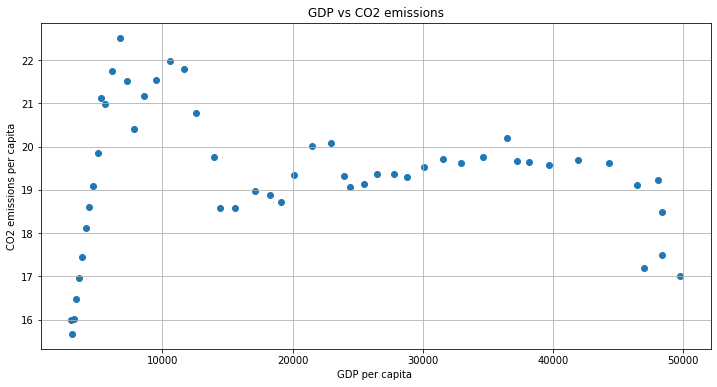

In [42]:
plt.figure(figsize=(12,6))
plt.title('GDP vs CO2 emissions')
plt.xlabel('GDP per capita ')
plt.ylabel('CO2 emissions per capita')
plt.scatter(gdp_us['gdp_val_pc'].values, co2_us['co2_val_pc'].values)
plt.grid()
plt.show()

It looks like the CO2 emission and gdp had positive relation in 1960 years and then there is no relation at all. Let's look at correlation as well.

In [43]:
gdp_vs_co2 = pd.merge(gdp_us, co2_us, how = 'outer')

In [44]:
gdp_vs_co2[['gdp_val_pc', 'co2_val_pc']].corr()

,gdp_val_pc,co2_val_pc
gdp_val_pc,1.000000,-0.072471
co2_val_pc,-0.072471,1.000000


It is pretty weak relation as could be seen from the scatter plot. So the CO2 emission is not related to the economy growth and vice versa

### Let's investigate if there is relationship of CO2 emissions with Oil prices. Oil prices from 1986 todate was obtained from https://fred.stlouisfed.org/series/DCOILWTICO 

In [45]:
# Read obtained csv
oil_df = pd.read_csv("./Resources/DCOILWTICO.csv")

# CSV contains information for multiple days a months since 1986 therefore data preparation is required 
for index, row in oil_df.iterrows():
    oil_df.loc[index, 'Year'] = row[0].split('-')[0]
oil_df = oil_df.rename(columns={'DCOILWTICO': 'oil_val'})
oil_df = oil_df.drop(columns='DATE')

As it can be seen now we have multiple values for each year. Let's group the dataset by Dates and find the mean for each year

In [46]:
# Because the elements in Price column are of object type, in this dataset they happen to be str,
#in orther to conduct any mathematical operations over them we have to convert them into float

oil_df['oil_val'] = pd.to_numeric(oil_df['oil_val'], errors='coerce')
oil_df['Year'] = pd.to_numeric(oil_df['Year'], errors='coerce')


# Now let's find mean Oil price for each year

oil_df = oil_df.groupby('Year')['oil_val'].mean().reset_index()

#Because our CO2 emissions data and the Oil prices data cover different timeframes we have to truncate both of the datasets

co2_oil = liq_fuel[liq_fuel['Year'] > 1985]
oil_co2 = oil_df[oil_df['Year'] < 2012]
co2_oil_comparison = pd.merge(co2_oil, oil_co2, how = 'outer')
co2_oil_comparison

,CountryCode,Liquid_Indicator,Year,Liq_Val,liq_val_pc,oil_val
0,USA,CO2 emissions from liquid fuel consumption (% ...,1986,45.531371,8.523802,15.047689
1,USA,CO2 emissions from liquid fuel consumption (% ...,1987,44.746510,8.658599,19.200512
2,USA,CO2 emissions from liquid fuel consumption (% ...,1988,44.592131,8.923070,15.965409
3,USA,CO2 emissions from liquid fuel consumption (% ...,1989,43.884721,8.810196,19.635486
4,USA,CO2 emissions from liquid fuel consumption (% ...,1990,41.336297,7.987565,24.526576
5,USA,CO2 emissions from liquid fuel consumption (% ...,1991,40.670653,7.752736,21.541367
6,USA,CO2 emissions from liquid fuel consumption (% ...,1992,40.851210,7.821191,20.575564
7,USA,CO2 emissions from liquid fuel consumption (% ...,1993,40.675836,7.876250,18.432200
8,USA,CO2 emissions from liquid fuel consumption (% ...,1994,40.723636,7.890838,17.196429
9,USA,CO2 emissions from liquid fuel consumption (% ...,1995,40.407794,7.796951,18.428805


### Let's investigate the correlation between the two indicators

In [47]:

co2_oil_comparison[['liq_val_pc', 'oil_val']].corr()
#plt.scatter(co2_oil_comparison['Year'], co2_oil_comparison['oil_val'])

,liq_val_pc,oil_val
liq_val_pc,1.000000,-0.668074
oil_val,-0.668074,1.000000


It is clear that there is a moderate to strong relationship between the two indicators. The correlation is negative which means that CO2 emissions increase as the Oil price goes down and vice versa.

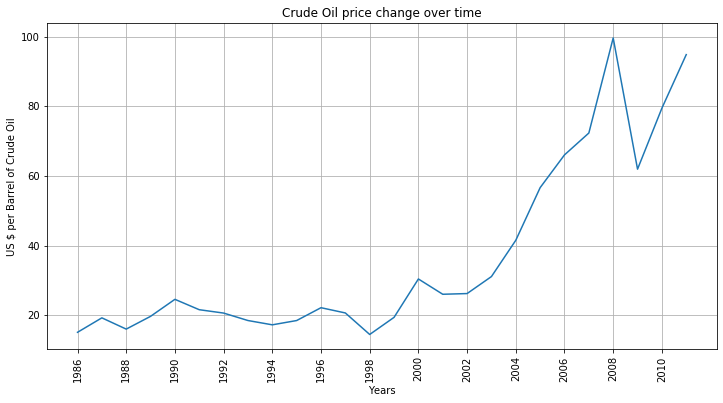

In [48]:
plt.figure(figsize=(12, 6))
plt.xticks(np.arange(min(co2_oil_comparison['Year']), max(co2_oil_comparison['Year'])+1, 2.0), rotation='vertical')
plt.xlabel('Years')
#plt.ylim(0, 120)
plt.ylabel('US $ per Barrel of Crude Oil')
plt.title('Crude Oil price change over time')
plt.plot(co2_oil_comparison['Year'], co2_oil_comparison['oil_val'])
plt.grid()
plt.show()

We can observe that there was a spike in Oil prices before the Great Recession and during the recession period the pricess drop. As we already raised question above, it looks like when Oil prices go up the CO2 emissions go down meanin the producers of the CO2 emissions from the usage of liquid fuel use less, but do they swithc to alternative energy? Let's look what happens. 

### Alternative and nuclear energy usage

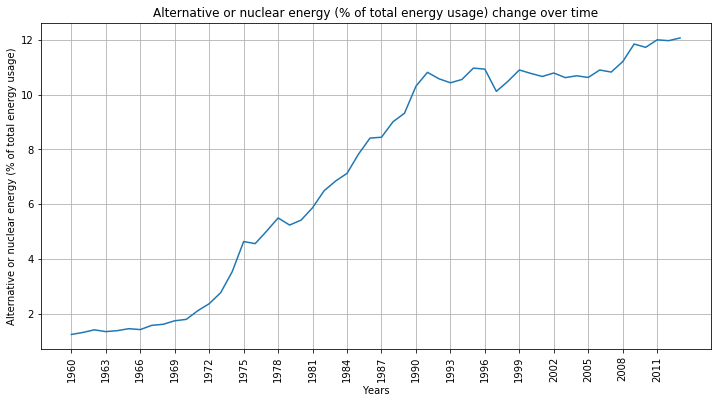

In [49]:
alt_ener_mask = short_data['IndicatorName'].str.contains('Alternative and nuclear energy \(% of')
alt_ener_us = short_data[alt_ener_mask & country]
alt_ener_us
plt.figure(figsize=(12,6))
plt.xticks(np.arange(min(alt_ener_us['Year']), max(alt_ener_us['Year'])+1, 3.0), rotation='vertical')
plt.plot(alt_ener_us['Year'], alt_ener_us['Value'])
plt.title('Alternative or nuclear energy (% of total energy usage) change over time')
plt.xlabel('Years')
plt.ylabel('Alternative or nuclear energy (% of total energy usage)')
plt.grid()
plt.show()

Our hypotheses about the alternative energy holds true based on the above plot. It looks like the alternative and nuclear energy was always relevant. Perhaps for the most part the plot shows the usage of nuclear energy rather the alternative energy (meaning Renewable energy). But if we look at the period from early 90's to the time before the Great Recession we can observe that the alternative or nuclear energy usage is generally stable. It seems like the Great Recession triggered the usage of alternative sources of energy but because the industry for the most part was not ready to switch to alternative means of energy the % value did not improve much.  

### Let's see how US stands against the World for the usage of Alternatie or Nuclear energy

In [50]:
hist_indicator = "Alternative and nuclear energy \(%"
hist_year = 2011

mask1_alt = short_data['IndicatorName'].str.contains(hist_indicator)
mask2_alt = short_data['Year'].isin([hist_year])

# apply mask

alt_2011 = short_data[mask1_alt & mask2_alt]


In [51]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = alt_2011['CountryCode'],
    z = alt_2011['Value'],
    autocolorscale=True,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = 'metric tons pc ',
    colorbar_title = 'Alternative and Nuclear energy (% of total)'))
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4))
fig.show()

### Let's now look at the electricity sales prices in the US to see if decrease in CO2 emission led to increase of retail prices.

Average Retail price of Electiricity is obtained from https://www.eia.gov/electricity/data/browser/#/topic/7?agg=0,1&geo=g&endsec=vg&linechart=ELEC.PRICE.US-ALL.A~ELEC.PRICE.US-RES.A~ELEC.PRICE.US-COM.A~ELEC.PRICE.US-IND.A&columnchart=ELEC.PRICE.US-ALL.A~ELEC.PRICE.US-RES.A~ELEC.PRICE.US-COM.A~ELEC.PRICE.US-IND.A&map=ELEC.PRICE.US-ALL.A&freq=A&ctype=linechart&ltype=pin&rtype=s&pin=&rse=0&maptype=0 

In [52]:
electricity_data = pd.read_csv("./Resources/Average_retail_price_of_electricity_United_States_annual.csv")
electricity_data = electricity_data[['Year', 'all sectors cents per kilowatthour']]
electricity_data = electricity_data.rename(columns={'all sectors cents per kilowatthour': 'av_price'})
electricity_data

,Year,av_price
0,2018,10.53
1,2017,10.48
2,2016,10.27
3,2015,10.41
4,2014,10.44
5,2013,10.07
6,2012,9.84
7,2011,9.90
8,2010,9.83
9,2009,9.82


,co2_val_pc,av_price
co2_val_pc,1.000000,-0.874974
av_price,-0.874974,1.000000


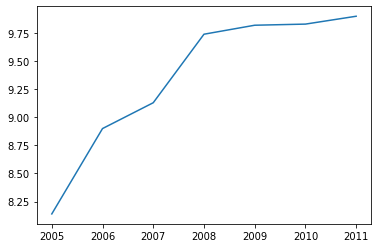

In [53]:
electricity_data = electricity_data.sort_values('Year', ascending=True)
electricity_data

electricity_data = electricity_data[(electricity_data['Year'] > 2004) & (electricity_data['Year'] < 2012)]
plt.plot(electricity_data['Year'], electricity_data['av_price'])
co2_elec_retail = pd.merge(co2_us_last, electricity_data, how='outer')
co2_elec_retail[['co2_val_pc',  'av_price']].corr()

In [54]:
co2_us

,CountryCode,CO2_Indicator,Year,co2_val_pc
0,USA,CO2 emissions (metric tons per capita),1960,15.999779
1,USA,CO2 emissions (metric tons per capita),1961,15.681256
2,USA,CO2 emissions (metric tons per capita),1962,16.013937
3,USA,CO2 emissions (metric tons per capita),1963,16.482762
4,USA,CO2 emissions (metric tons per capita),1964,16.968119
5,USA,CO2 emissions (metric tons per capita),1965,17.451725
6,USA,CO2 emissions (metric tons per capita),1966,18.121073
7,USA,CO2 emissions (metric tons per capita),1967,18.598318
8,USA,CO2 emissions (metric tons per capita),1968,19.089389
9,USA,CO2 emissions (metric tons per capita),1969,19.857946
